In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 1000)

In [2]:
df = pd.read_csv('creditcard_data.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168486 entries, 0 to 168485
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    168486 non-null  float64
 1   V1      168486 non-null  float64
 2   V2      168486 non-null  float64
 3   V3      168486 non-null  float64
 4   V4      168486 non-null  float64
 5   V5      168486 non-null  float64
 6   V6      168486 non-null  float64
 7   V7      168486 non-null  float64
 8   V8      168486 non-null  float64
 9   V9      168486 non-null  float64
 10  V10     168486 non-null  float64
 11  V11     168486 non-null  float64
 12  V12     168485 non-null  float64
 13  V13     168485 non-null  float64
 14  V14     168485 non-null  float64
 15  V15     168485 non-null  float64
 16  V16     168485 non-null  float64
 17  V17     168485 non-null  float64
 18  V18     168485 non-null  float64
 19  V19     168485 non-null  float64
 20  V20     168485 non-null  float64
 21  V21     16

发现有一行有空值,这里为了方便可以直接删除(其实也可以填充处理)

In [4]:
df.dropna(axis=0, how='any', inplace=True)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,168485.000000,168485.000000,168485.000000,168485.000000,168485.000000,168485.000000,168485.000000,168485.000000,168485.000000,168485.000000,168485.000000,168485.000000,168485.000000,168485.000000,168485.000000,168485.000000,168485.000000,168485.000000,168485.000000,168485.000000,168485.000000,168485.000000,168485.000000,168485.000000,168485.000000,168485.000000,168485.000000,168485.000000,168485.000000,168485.000000,168485.000000
mean,60255.761077,-0.176799,0.044458,0.509626,0.121590,-0.183041,0.060004,-0.084165,0.034549,0.019399,-0.032191,0.199641,-0.099832,0.067688,0.086248,0.137754,-0.008403,0.043487,-0.052073,-0.020044,0.031666,-0.030139,-0.086818,-0.022820,0.009332,0.095225,0.012993,0.002296,0.002503,87.058915,0.002137
std,27122.740577,1.847363,1.609053,1.376521,1.369692,1.334889,1.293544,1.205982,1.230150,1.153458,1.095450,1.047398,1.148140,1.050466,0.978638,0.951554,0.882531,0.915163,0.834666,0.812023,0.722440,0.743857,0.664975,0.583410,0.598473,0.463223,0.491036,0.391532,0.307610,243.583858,0.046175
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,-24.588262,-4.049895,-18.683715,-5.791881,-19.214325,-4.498945,-14.129855,-25.162799,-9.498746,-7.213527,-22.838548,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,40964.000000,-0.990038,-0.535326,-0.040989,-0.738419,-0.834159,-0.688718,-0.587245,-0.160211,-0.660043,-0.519695,-0.557909,-0.513005,-0.625797,-0.333400,-0.444666,-0.470921,-0.415703,-0.524216,-0.498660,-0.182805,-0.231030,-0.547576,-0.170266,-0.331779,-0.190967,-0.330423,-0.064789,-0.024832,5.410000,0.000000
50%,60221.000000,-0.192237,0.112563,0.635293,0.128515,-0.231876,-0.200816,-0.034053,0.058328,-0.079760,-0.112718,0.126196,0.111211,0.033057,0.095046,0.250748,0.063440,-0.016542,-0.052640,-0.023405,-0.035598,-0.055577,-0.069151,-0.036786,0.060085,0.138837,-0.059155,0.008970,0.021374,21.600000,0.000000
75%,77993.000000,1.181781,0.806299,1.303683,0.942587,0.365016,0.450632,0.458982,0.352685,0.643949,0.406341,1.007732,0.618459,0.747063,0.530037,0.833776,0.527346,0.436638,0.429914,0.467016,0.156089,0.125896,0.358395,0.097221,0.415181,0.400955,0.273076,0.089729,0.078326,76.480000,0.000000
max,119245.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,23.745136,12.018913,7.848392,4.569009,10.526766,5.784514,6.098529,9.253526,5.041069,5.228342,39.420904,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


In [6]:
real = df[df['Class'] == 0]
fake = df[~df.index.isin(real.index)]
"数据集中一共有{}条真实数据, {}条欺诈数据".format(real.shape[0], fake.shape[0])

'数据集中一共有168125条真实数据, 360条欺诈数据'

由于原始数据中没有提供训练集和测试集,所以进行人工分割.我们取约80%的数据作为训练建模, 20%验证结果.由于数据极度不平衡,所以需要对欺诈和非欺诈数据进行单独处理,以免出现欺诈数据全部集中在训练/测试集的情况

In [7]:
trlr = int(real.shape[0] * 0.8)
trlf = int(fake.shape[0] * 0.8)

train_real = real.sample(trlr)
train_fake = fake.sample(trlf)
test_real = real[~real.index.isin(train_real.index)]
test_fake = fake[~fake.index.isin(train_fake.index)]

In [8]:
train = pd.concat([train_real, train_fake], axis = 0)
test = pd.concat([test_real, test_fake], axis = 0)

In [9]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134788 entries, 86468 to 43624
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    134788 non-null  float64
 1   V1      134788 non-null  float64
 2   V2      134788 non-null  float64
 3   V3      134788 non-null  float64
 4   V4      134788 non-null  float64
 5   V5      134788 non-null  float64
 6   V6      134788 non-null  float64
 7   V7      134788 non-null  float64
 8   V8      134788 non-null  float64
 9   V9      134788 non-null  float64
 10  V10     134788 non-null  float64
 11  V11     134788 non-null  float64
 12  V12     134788 non-null  float64
 13  V13     134788 non-null  float64
 14  V14     134788 non-null  float64
 15  V15     134788 non-null  float64
 16  V16     134788 non-null  float64
 17  V17     134788 non-null  float64
 18  V18     134788 non-null  float64
 19  V19     134788 non-null  float64
 20  V20     134788 non-null  float64
 21  V21    

In [10]:
train.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,134788.000000,134788.000000,134788.000000,134788.000000,134788.000000,134788.000000,134788.000000,134788.000000,134788.000000,134788.000000,134788.000000,134788.000000,134788.000000,134788.000000,134788.000000,134788.000000,134788.000000,134788.000000,134788.000000,134788.000000,134788.000000,134788.000000,134788.000000,134788.000000,134788.000000,134788.000000,134788.000000,134788.000000,134788.000000,134788.000000,134788.000000
mean,60226.293995,-0.178468,0.046261,0.510542,0.119410,-0.180810,0.060537,-0.082796,0.033685,0.019212,-0.031908,0.198912,-0.100582,0.068903,0.085992,0.137462,-0.008531,0.044208,-0.052489,-0.018630,0.030548,-0.029518,-0.087169,-0.021587,0.009491,0.095293,0.013648,0.002980,0.002149,86.656780,0.002137
std,27137.576969,1.841667,1.603353,1.369108,1.367266,1.329861,1.294686,1.187156,1.233925,1.151735,1.089085,1.046522,1.147770,1.050424,0.979250,0.952154,0.882611,0.915151,0.834241,0.812117,0.715141,0.743398,0.664429,0.576513,0.598368,0.463057,0.490977,0.390594,0.311170,239.693056,0.046175
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-41.506796,-50.943369,-13.434066,-24.403185,-4.049895,-18.683715,-4.008640,-19.214325,-4.199321,-14.129855,-25.162799,-9.335193,-7.213527,-22.838548,-22.889347,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-22.565679,-11.710896,0.000000,0.000000
25%,40907.000000,-0.990987,-0.532951,-0.041455,-0.738358,-0.830543,-0.688393,-0.587233,-0.160211,-0.658964,-0.520090,-0.559894,-0.514265,-0.622585,-0.333473,-0.444973,-0.471190,-0.415270,-0.523483,-0.497284,-0.183086,-0.230774,-0.546712,-0.170785,-0.331929,-0.190947,-0.329974,-0.064526,-0.025191,5.380000,0.000000
50%,60186.000000,-0.198408,0.114150,0.636252,0.126805,-0.229711,-0.200564,-0.033743,0.058378,-0.080205,-0.112578,0.125181,0.111526,0.035412,0.094960,0.250191,0.062883,-0.016085,-0.052690,-0.022028,-0.035738,-0.056279,-0.068924,-0.037056,0.060585,0.139027,-0.057895,0.008972,0.021338,21.600000,0.000000
75%,77993.000000,1.181806,0.807633,1.303045,0.937791,0.367949,0.450621,0.457931,0.353446,0.641693,0.406746,1.005937,0.618000,0.746595,0.530507,0.833273,0.527701,0.437722,0.428227,0.467231,0.155886,0.124705,0.357461,0.097550,0.415359,0.401008,0.273770,0.090056,0.078313,76.000000,0.000000
max,119245.000000,2.439207,21.467203,9.382558,16.715537,34.801666,22.529298,36.677268,20.007208,15.594995,23.745136,12.018913,4.846452,4.569009,7.754599,5.784514,6.098529,9.253526,5.041069,4.891062,39.420904,27.202839,8.361985,19.002942,4.022866,7.519589,3.463246,11.135740,33.847808,19656.530000,1.000000


In [11]:
test.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,33697.000000,33697.000000,33697.000000,33697.000000,33697.000000,33697.000000,33697.000000,33697.000000,33697.000000,33697.000000,33697.000000,33697.000000,33697.000000,33697.000000,33697.000000,33697.000000,33697.000000,33697.000000,33697.000000,33697.000000,33697.000000,33697.000000,33697.000000,33697.000000,33697.000000,33697.000000,33697.000000,33697.000000,33697.000000,33697.000000,33697.000000
mean,60373.629403,-0.170123,0.037244,0.505964,0.130309,-0.191963,0.057872,-0.089643,0.038006,0.020145,-0.033321,0.202556,-0.096832,0.062829,0.087268,0.138922,-0.007890,0.040605,-0.050412,-0.025701,0.036135,-0.032624,-0.085412,-0.027754,0.008693,0.094953,0.010374,-0.000439,0.003921,88.667452,0.002137
std,27063.394840,1.869984,1.631655,1.405800,1.379338,1.354797,1.288985,1.278520,1.214945,1.160340,1.120562,1.050904,1.149632,1.050634,0.976198,0.949165,0.882227,0.915217,0.836372,0.811635,0.750920,0.745698,0.667162,0.610203,0.598905,0.463892,0.491269,0.395254,0.292939,258.559723,0.046176
min,0.000000,-34.549296,-60.464618,-30.177317,-5.263068,-27.752964,-19.996349,-43.557242,-73.216718,-13.320155,-24.588262,-3.139342,-16.558197,-5.791881,-17.475921,-4.498945,-12.675269,-22.608868,-9.498746,-6.938297,-19.902611,-34.830382,-9.499423,-26.751119,-2.822684,-7.495741,-2.604551,-8.260909,-8.364853,0.000000,0.000000
25%,41156.000000,-0.987223,-0.544593,-0.038541,-0.738925,-0.847294,-0.690109,-0.587368,-0.161044,-0.667442,-0.518697,-0.550987,-0.508672,-0.640370,-0.332782,-0.443170,-0.469752,-0.417652,-0.527621,-0.502881,-0.182053,-0.232355,-0.550171,-0.168541,-0.331322,-0.191163,-0.331885,-0.065502,-0.023512,5.490000,0.000000
50%,60378.000000,-0.166675,0.106233,0.630777,0.133291,-0.240097,-0.202014,-0.036142,0.058006,-0.076360,-0.113092,0.129952,0.110938,0.026565,0.095317,0.252127,0.065114,-0.018526,-0.052049,-0.029157,-0.035039,-0.053110,-0.070557,-0.035866,0.057995,0.138390,-0.063585,0.008946,0.021512,21.680000,0.000000
75%,77990.000000,1.181707,0.800740,1.306190,0.959393,0.352678,0.450824,0.462132,0.349179,0.649989,0.404647,1.010886,0.620394,0.748137,0.528585,0.836030,0.526156,0.432747,0.435336,0.465982,0.157696,0.131154,0.361806,0.096213,0.414519,0.400611,0.270247,0.088664,0.078347,78.130000,0.000000
max,119240.000000,2.367002,22.057729,4.029428,16.875344,28.762671,18.072031,28.504065,18.329406,10.326133,13.164571,11.152491,7.848392,4.465413,10.526766,4.153006,5.477283,9.207059,4.712398,5.228342,38.117209,22.588989,10.503090,18.364472,3.998294,5.525093,3.517346,12.152401,15.866721,18910.000000,1.000000


In [12]:
x_names = [item for item in train.columns if item != 'Class']
train_y = train['Class']
train_x = train[x_names]
test_y = test['Class']
test_x = test[x_names]

由于实际业务中我们其实是不知道test_x的(因为在建模的时候通常没有test数据, test是模型建立后你需要预测的), 所以仅使用train_x绘制热力图

<AxesSubplot:>

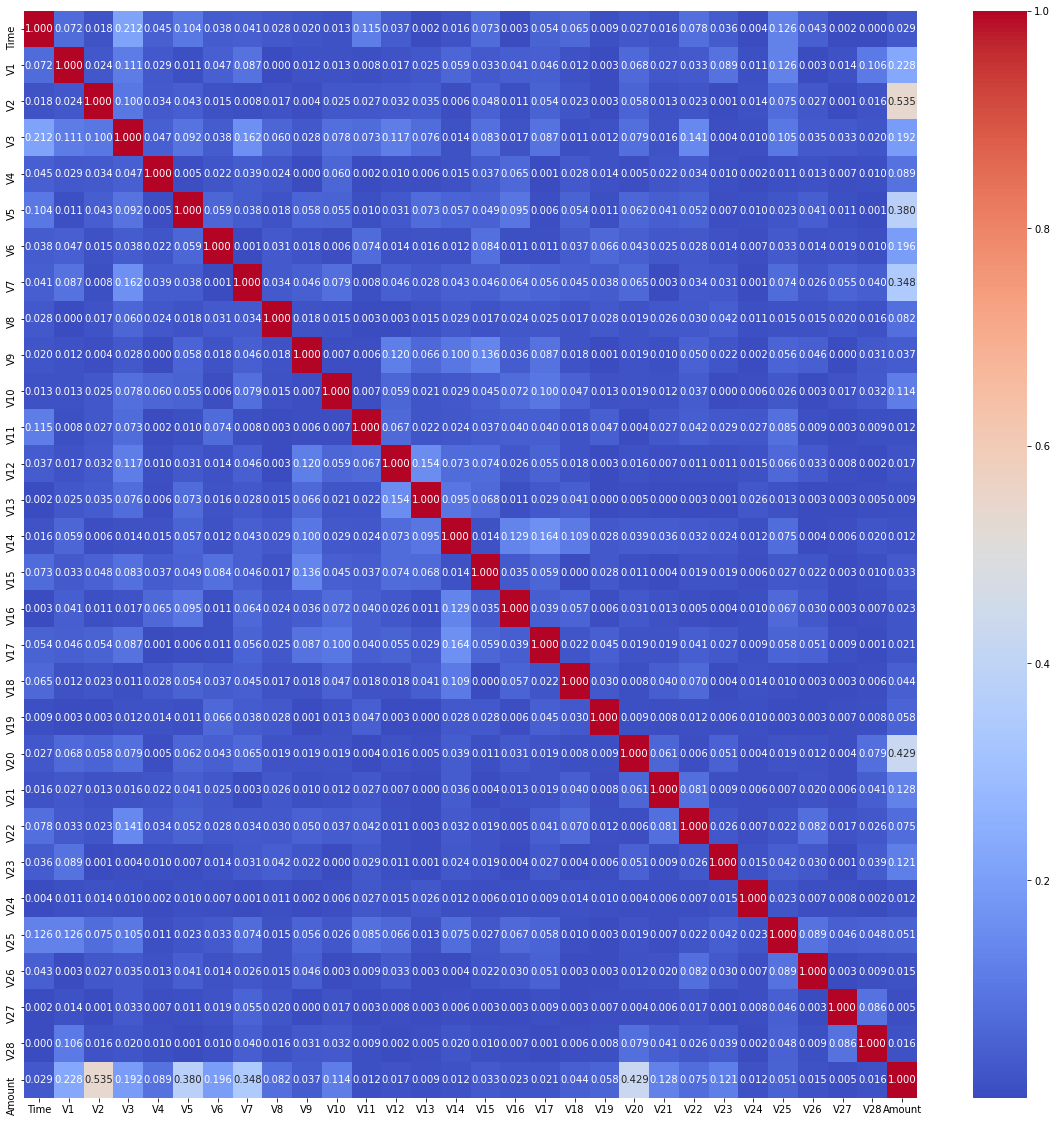

In [13]:
corrs = train_x.corr().abs()
plt.figure(figsize = (20, 20))
sns.heatmap(corrs, annot = True, fmt = '.3f', cmap = 'coolwarm')

从热力图中可以看到没有关联度过高的变量

In [14]:
train_x = (train_x - train_x.min()) / (train_x.max() - train_x.min())
test_x = (test_x - test_x.min()) / (test_x.max() - test_x.min())

In [15]:
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold, cross_validate, learning_curve
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

In [16]:
# random state
rs = 1

log_reg = LogisticRegression()
gbc = GradientBoostingClassifier(random_state = rs)
rfc = RandomForestClassifier(random_state = rs)
lgb = lgb.LGBMClassifier(learning_rate=0.001, random_state = rs)
xgb = xgb.XGBClassifier(random_state = rs)
gnb = GaussianNB()
mlpc = MLPClassifier(random_state = rs)
svc = SVC(probability=True)

In [17]:
models = [log_reg, gbc, rfc, lgb, xgb, gnb, mlpc, svc]

In [18]:
def estimate(x, y, models, cv):
    train_acc, test_acc = dict(), dict()
    for m in models:
        mname = m.__class__.__name__
        # 注意这里是sklearn自带的k折数据分割,如果条件允许需要手动进行分割否则会导致自动分割出现"没有欺诈数据"的情况
        cv_res = cross_validate(m, x, y, cv = cv, return_train_score=True, scoring = "roc_auc") #极度不平衡,ROC更好用
        train_acc[mname] = cv_res['train_score'].mean()
        test_acc[mname] = cv_res['test_score'].mean()
        print(mname + '训练完成')
    return train_acc, test_acc

In [19]:
cv = StratifiedKFold(5, shuffle = True, random_state = rs)
train_acc_dict, test_acc_dict = estimate(train_x, train_y, models, cv)

LogisticRegression训练完成
GradientBoostingClassifier训练完成
RandomForestClassifier训练完成
LGBMClassifier训练完成
C:\Users\Admin\.conda\envs\analyze\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[18:36:49] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
C:\Users\Admin\.conda\envs\analyze\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release

In [20]:
print("Training AUC")
for k, v in train_acc_dict.items():
    print(k + ':' + str(v * 100) + "%")

Training Accuracy
LogisticRegression:98.16259975356792%
GradientBoostingClassifier:73.50646036900442%
RandomForestClassifier:100.0%
LGBMClassifier:98.46075193797634%
XGBClassifier:100.0%
GaussianNB:96.39458383623811%
MLPClassifier:97.84285505777021%
SVC:97.87030475504777%


In [27]:
print("Test AUC")
for k, v in test_acc_dict.items():
    print(k + ':' + str(v * 100) + "%")

Training Accuracy
LogisticRegression:97.9861315575826%
GradientBoostingClassifier:72.21057106938606%
RandomForestClassifier:95.32427399096382%
LGBMClassifier:95.26205119901408%
XGBClassifier:97.53207775881185%
GaussianNB:96.340425653931%
MLPClassifier:97.51636317431188%
SVC:96.7620498496594%


In [35]:
from sklearn import metrics

rfc.fit(train_x, train_y)
ans = rfc.predict(test_x)

fpr, tpr, thresholds = metrics.roc_curve(test_y, ans)
metrics.auc(fpr, tpr)

0.8817511358942585

In [36]:
fn = 0
fp = 0
pc = 0
nc = 0
test_y = test_y.tolist()
for i in range(len(ans)):
    if test_y[i] != ans[i]:
        if ans[i] == 0:
            fp += 1
        else:
            fn += 1
    if test_y[i] == 0:
        pc += 1
    else:
        nc += 1
print("错误地将{}个数据预测成了错误数据(原始正确数据一共{}个), 错误地将{}个数据预测成了正确数据(原始错误数据一共{}个)".format(fn, pc, fp, nc))

错误地将13个数据预测成了错误数据(原始正确数据一共33625个), 错误地将17个数据预测成了正确数据(原始错误数据一共72个)
